In [2]:
import pandas as pd
from dateutil.rrule import rrule, DAILY
import urllib.request, json 

## collect inventory from USGS
Query guide: https://landsatlook.usgs.gov/stac-server/api.html#tag/Item-Search


Example URL:
https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l1/items?limit=10000&datetime=2022-01-06T00:00:00Z/2022-01-07T00:00:00Z&fields=id,-type,-geometry,-bbox,-properties,-links,-assets,-collection,-features

In [64]:


a = date(2022, 9, 30)
b = date(2022, 10, 8)

for dt in rrule(DAILY, dtstart=a, until=b):
    print(dt.strftime("%Y-%m-%d"))
    yymmdd = dt.strftime("%Y-%m-%d")
    dt

2022-09-30
2022-10-01
2022-10-02
2022-10-03
2022-10-04
2022-10-05
2022-10-06
2022-10-07
2022-10-08


In [65]:
url = f'''https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l1/items?limit=10000&datetime={yymmdd}T00:00:00Z/{yymmdd}T23:59:59Z&fields=id,-type,-geometry,-bbox,properties,-links,-assets,-collection,-features'''

In [70]:
stat_list = []

In [67]:

with urllib.request.urlopen(url) as uo:
    data = json.load(uo)
    #print(data)
    feature_df = pd.json_normalize(data['features'])
    l9 = feature_df.query('`properties.platform`=="LANDSAT_9"')
    l8 = feature_df.query('`properties.platform`=="LANDSAT_8"')
    stat_list.append({'date':yymmdd,'total':data['numberMatched'],'return':data['numberReturned'],'LC09':len(l9),'LC08':len(l9)})
    feature_df.drop('type',axis=1).to_csv(f'../../../data/Landsat/stac/{dt.strftime("%Y-%m-%d")}_C2L1.csv',index=False)


In [85]:
pd.DataFrame(stat_list).query('`date` > "2021-09-27"').to_csv('../../../data/Landsat/day_sum_LC09_LC08.csv',index=False)

In [86]:
day_sum = pd.DataFrame(stat_list).query('`date` > "2021-09-27"')

In [63]:
pd.json_normalize(data['features']).query('`properties.platform`=="LANDSAT_9"')

,id,type,properties.landsat:scene_id,properties.landsat:wrs_row,properties.landsat:cloud_cover_land,properties.platform,properties.landsat:wrs_path,properties.accuracy:geometric_y_bias,properties.landsat:collection_number,properties.view:sun_elevation,...,properties.created,properties.view:sun_azimuth,properties.view:off_nadir,properties.accuracy:geometric_rmse,properties.proj:epsg,properties.accuracy:geometric_x_stddev,properties.proj:transform,properties.accuracy:geometric_y_stddev,properties.updated,properties.landsat:collection_category
1,LC09_L1GT_089122_20220106_20220122_02_T2,Feature,LC90891222022006LGN01,122,100.00,LANDSAT_9,089,NaN,02,18.350220,...,2022-07-06T20:24:56.852Z,121.003686,0,NaN,3031,NaN,"[30, 0, 664185, 0, -30, 528615]",NaN,2022-07-06T20:24:56.852Z,T2
2,LC09_L1GT_089121_20220106_20220122_02_T2,Feature,LC90891212022006LGN01,121,99.92,LANDSAT_9,089,NaN,02,19.584935,...,2022-07-06T18:19:53.500Z,111.307306,0,NaN,3031,NaN,"[30, 0, 735585, 0, -30, 386115]",NaN,2022-07-06T18:19:53.500Z,T2
3,LC09_L1GT_089120_20220106_20220122_02_T2,Feature,LC90891202022006LGN01,120,1.83,LANDSAT_9,089,NaN,02,20.816372,...,2022-07-06T18:15:31.820Z,102.201143,0,NaN,3031,NaN,"[30, 0, 806085, 0, -30, 243315]",NaN,2022-07-06T18:15:31.820Z,T2
4,LC09_L1GT_089119_20220106_20220122_02_T2,Feature,LC90891192022006LGN01,119,0.00,LANDSAT_9,089,NaN,02,22.043834,...,2022-07-06T18:28:57.045Z,94.086630,0,NaN,3031,NaN,"[30, 0, 875985, 0, -30, 99915]",NaN,2022-07-06T18:28:57.045Z,T2
5,LC09_L1GT_089118_20220106_20220122_02_T2,Feature,LC90891182022006LGN01,118,99.99,LANDSAT_9,089,NaN,02,23.267096,...,2022-07-06T18:24:09.997Z,87.125919,0,NaN,3031,NaN,"[30, 0, 944985, 0, -30, -43785]",NaN,2022-07-06T18:24:09.997Z,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,LC09_L1GT_098023_20220106_20220123_02_T2,Feature,LC90980232022006LGN01,023,58.25,LANDSAT_9,098,NaN,02,12.904994,...,2022-07-06T21:20:23.344Z,163.691517,0,NaN,32657,NaN,"[30, 0, 464685, 0, -30, 6003315]",NaN,2022-07-06T21:20:23.344Z,T2
1697,LC09_L1TP_098022_20220106_20220123_02_T2,Feature,LC90980222022006LGN01,022,47.29,LANDSAT_9,098,NaN,02,11.649075,...,2022-07-06T09:20:54.994Z,164.324747,0,NaN,32657,NaN,"[30, 0, 506985, 0, -30, 6160515]",NaN,2022-07-06T17:49:51.134Z,T2
1698,LC09_L1GT_098021_20220106_20220123_02_T2,Feature,LC90980212022006LGN01,021,72.52,LANDSAT_9,098,NaN,02,10.392067,...,2022-07-06T21:22:35.488Z,164.983192,0,NaN,32657,NaN,"[30, 0, 548385, 0, -30, 6317715]",NaN,2022-07-06T21:22:35.488Z,T2
1699,LC09_L1GT_098020_20220106_20220123_02_T2,Feature,LC90980202022006LGN01,020,85.68,LANDSAT_9,098,NaN,02,9.133341,...,2022-07-06T18:25:05.489Z,165.673075,0,NaN,32658,NaN,"[30, 0, 222285, 0, -30, 6478515]",NaN,2022-07-06T18:25:05.489Z,T2


### Batch processing

In [75]:
a = date(2021, 9, 15)
b = date(2022, 10, 8)
stat_list=[]
for dt in rrule(DAILY, dtstart=a, until=b):
    print(dt.strftime("%Y-%m-%d"))
    yymmdd = dt.strftime("%Y-%m-%d")
    url = f'''https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l1/items?limit=10000&datetime={yymmdd}T00:00:00Z/{yymmdd}T23:59:59Z&fields=id,-type,-geometry,-bbox,properties,-links,-assets,-collection,-features'''
    try:
        with urllib.request.urlopen(url) as uo:
            data = json.load(uo)
            #print(data)
            feature_df = pd.json_normalize(data['features'])
            l9 = feature_df.query('`properties.platform`=="LANDSAT_9"')
            l8 = feature_df.query('`properties.platform`=="LANDSAT_8"')
            stat_list.append({'date':yymmdd,'total':data['numberMatched'],'return':data['numberReturned'],'LC09':len(l9),'LC08':len(l8)})
            if len(l9)>0:
                l9.drop('type',axis=1).to_csv(f'../../../data/Landsat/stac/{dt.strftime("%Y-%m-%d")}_C2L1_LC09.csv',index=False)
            else:
                print('no LC09')
            print(stat_list[-1])
    except e:
        print(e)

2021-09-15
no LC09
{'date': '2021-09-15', 'total': 1266, 'return': 1266, 'LC09': 0, 'LC08': 757}
2021-09-16
no LC09
{'date': '2021-09-16', 'total': 1187, 'return': 1187, 'LC09': 0, 'LC08': 722}
2021-09-17
no LC09
{'date': '2021-09-17', 'total': 1265, 'return': 1265, 'LC09': 0, 'LC08': 756}
2021-09-18
no LC09
{'date': '2021-09-18', 'total': 1197, 'return': 1197, 'LC09': 0, 'LC08': 744}
2021-09-19
no LC09
{'date': '2021-09-19', 'total': 1243, 'return': 1243, 'LC09': 0, 'LC08': 724}
2021-09-20
no LC09
{'date': '2021-09-20', 'total': 1212, 'return': 1212, 'LC09': 0, 'LC08': 738}
2021-09-21
no LC09
{'date': '2021-09-21', 'total': 1208, 'return': 1208, 'LC09': 0, 'LC08': 734}
2021-09-22
no LC09
{'date': '2021-09-22', 'total': 1229, 'return': 1229, 'LC09': 0, 'LC08': 767}
2021-09-23
no LC09
{'date': '2021-09-23', 'total': 1162, 'return': 1162, 'LC09': 0, 'LC08': 679}
2021-09-24
no LC09
{'date': '2021-09-24', 'total': 1268, 'return': 1268, 'LC09': 0, 'LC08': 775}
2021-09-25
no LC09
{'date': '2

## compare file entries on local node
First run `find . -type f -name '*.tar' -exec basename {} .tar \; > landsat_avail.txt` on local inventory

In [6]:
glad21 = pd.read_csv("../../../data/Landsat/landsat9_avail_2021.txt",names=['scene_id'], header=None)

In [7]:
glad22 = pd.read_csv("../../../data/Landsat/landsat_avail_2022.txt",names=['scene_id'], header=None)

In [11]:
glad_inventory = pd.concat([glad21,glad22[glad22.scene_id.str.startswith("LC09")]])

In [13]:
import glob

In [15]:
usgs_inventory = pd.concat([pd.read_csv(f) for f in glob.glob('../../../data/Landsat/stac/*.csv')])

In [22]:
inventory_merged = usgs_inventory.merge(glad_inventory,left_on='id',right_on='scene_id',how='left')

In [27]:
missing = inventory_merged.query('scene_id.isnull()',engine='python')

In [73]:
missing.shape

(128879, 27)

In [29]:
missing.dtypes

id                                         object
properties.landsat:scene_id                object
properties.landsat:wrs_row                  int64
properties.landsat:wrs_type                 int64
properties.created                         object
properties.landsat:cloud_cover_land       float64
properties.view:sun_azimuth               float64
properties.view:off_nadir                 float64
properties.platform                        object
properties.landsat:wrs_path                 int64
properties.landsat:collection_number        int64
properties.proj:epsg                        int64
properties.view:sun_elevation             float64
properties.datetime                        object
properties.instruments                     object
properties.proj:shape                      object
properties.proj:transform                  object
properties.eo:cloud_cover                 float64
properties.updated                         object
properties.landsat:correction              object


### Spatial and temporal visualization on the missing scenes

In [40]:
import seaborn as sns

In [71]:
pathrow_missing = missing.groupby(["properties.landsat:wrs_path","properties.landsat:wrs_row"]).agg({'id':'count'}).reset_index().set_axis(['path','row','count'],axis=1)\
    .pivot(index='row',columns='path',values='count').fillna(0)

<AxesSubplot: xlabel='path', ylabel='row'>

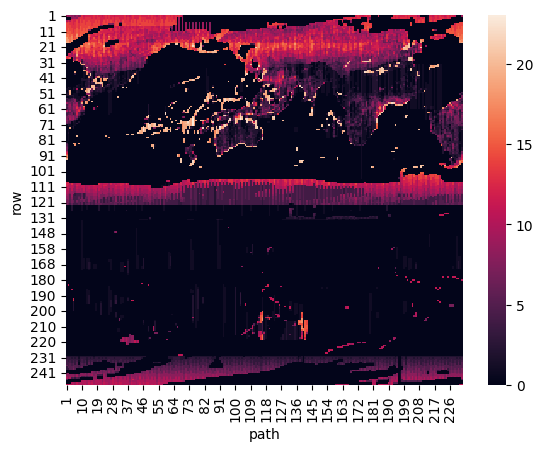

In [72]:
sns.heatmap(pathrow_missing)


In [49]:
missing['properties.datetime'] = missing['properties.datetime'].astype('datetime64[ns]')

/tmp/ipykernel_247135/2753046285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['properties.datetime'] = missing['properties.datetime'].astype('datetime64[ns]')


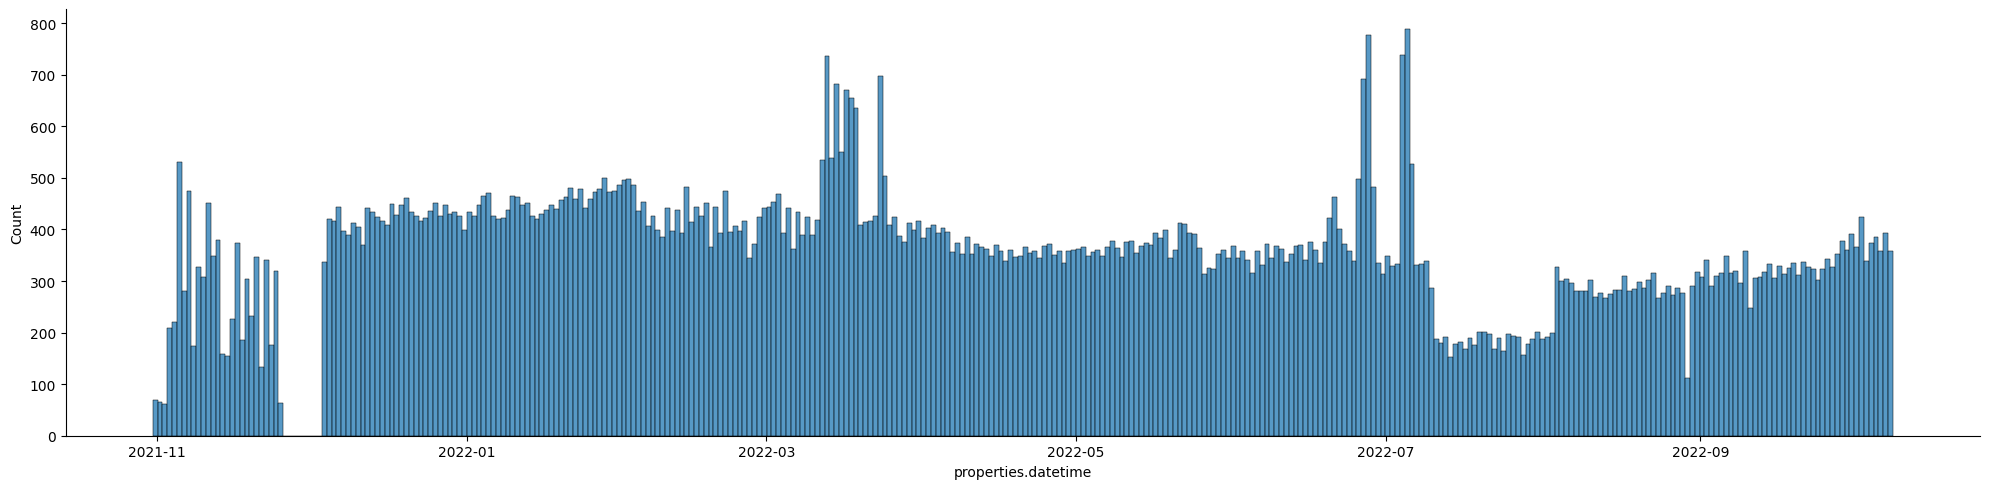

In [64]:
sns.displot(data=missing,x='properties.datetime',aspect=4,bins=360)